In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

sales = pd.read_excel("sales_AL.xlsx")
industry = pd.read_csv("application_jobIndustry (2).csv")




In [14]:
print(sales.columns)
print(industry.columns)

Index(['Payment Date', 'Guarantee ID', 'Type', 'Sale Type', 'Payment Amount',
       'Guarantee Fee', 'Fee Amount', 'Risk Fee Amount',
       'Transaction Fee Amount', 'Total Paid', 'Refund Date', 'Property',
       'Company', 'City', 'State', 'Zip', 'Sign Up Date', 'Sales Rep',
       'App ID', 'Guarantee Status', 'Guarantee Sub-status',
       'First Payment Date', 'Refunded', 'Purchase Type',
       'Monthly Payment Status', 'Total Monthly Payments',
       'Monthly Payment Count', 'Gross Monthly Income', 'Credit Score',
       'Has Co-applicant', 'Last Payment Date', 'Lapsed', 'Default',
       'Default Submitted Date', 'Default Payout Date',
       'Default Payout Amount', 'Refund Amount', 'Guarantee Start Date',
       'Guarantee End Date', 'Referral Source'],
      dtype='object')
Index(['oag_id', 'first_name', 'last_name', 'job_industry', 'created_date'], dtype='object')


In [18]:
merged = pd.merge(sales, industry, left_on='App ID', right_on='oag_id', how='left')



In [22]:
merged['Estimated_Rent'] = merged['Gross Monthly Income'] * 0.30


In [24]:
merged['Rent_Burden'] = merged['Estimated_Rent'] / merged['Gross Monthly Income']


In [26]:
merged['Default_Flag'] = merged['Default'].map({'Yes': 1, 'No': 0})


In [28]:
features = ['Gross Monthly Income', 'Estimated_Rent', 'Rent_Burden', 'Credit Score']
X = merged[features].fillna(0)
y = merged['Default_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      6072
           1       0.00      0.00      0.00       466

    accuracy                           0.93      6538
   macro avg       0.46      0.50      0.48      6538
weighted avg       0.86      0.93      0.89      6538



C:\Users\manas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\manas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\manas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C:\Users\manas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


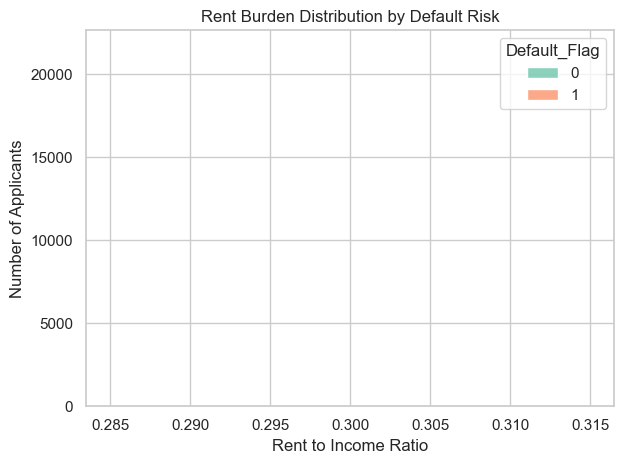

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="whitegrid")
sns.histplot(data=merged, x='Rent_Burden', hue='Default_Flag', multiple='stack', bins=50, palette='Set2')
plt.title("Rent Burden Distribution by Default Risk")
plt.xlabel("Rent to Income Ratio")
plt.ylabel("Number of Applicants")
plt.tight_layout()
plt.show()



In [ ]:
features = ['Income', 'Rent', 'Rent_Burden', 'Credit_Score']
X = merged[features].fillna(0)
y = merged['Default_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

sns.histplot(data=merged, x='Rent_Burden', hue='Default_Flag', multiple='stack')
plt.title("Rent Burden Distribution by Default Risk")
plt.xlabel("Rent to Income Ratio")
plt.ylabel("Number of Applicants")
plt.show()


In [42]:
print(merged['Rent_Burden'].describe())
print(merged['Rent_Burden'].unique())


count    2.164600e+04
mean     3.000000e-01
std      1.144114e-13
min      3.000000e-01
25%      3.000000e-01
50%      3.000000e-01
75%      3.000000e-01
max      3.000000e-01
Name: Rent_Burden, dtype: float64
[0.3 0.3]


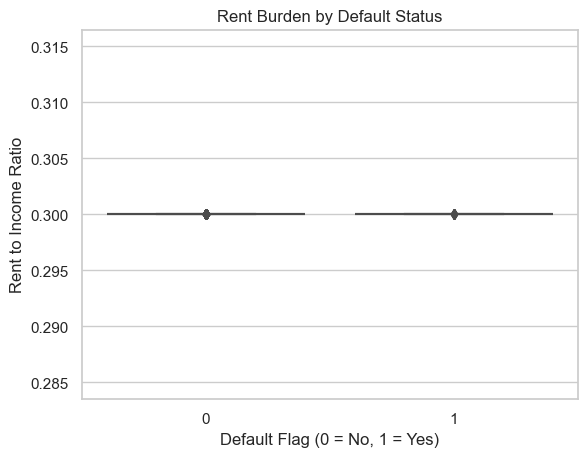

In [44]:
sns.boxplot(x='Default_Flag', y='Rent_Burden', data=merged)
plt.title("Rent Burden by Default Status")
plt.xlabel("Default Flag (0 = No, 1 = Yes)")
plt.ylabel("Rent to Income Ratio")
plt.show()

C:\Users\manas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


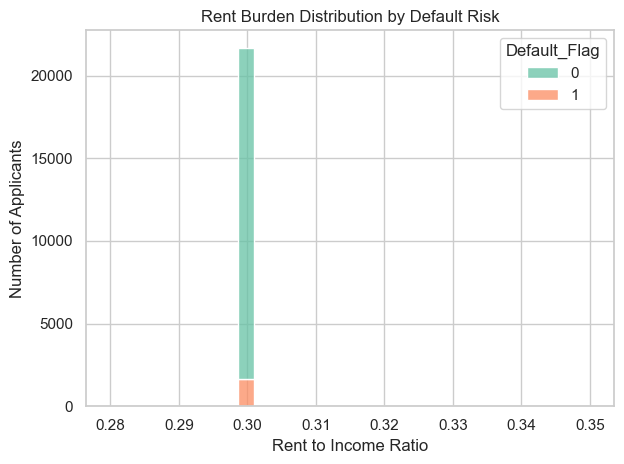

In [46]:
sns.histplot(
    data=merged,
    x='Rent_Burden',
    hue='Default_Flag',
    multiple='stack',
    bins=30,
    binrange=(0.28, 0.35),
    palette='Set2'
)
plt.title("Rent Burden Distribution by Default Risk")
plt.xlabel("Rent to Income Ratio")
plt.ylabel("Number of Applicants")
plt.tight_layout()
plt.show()


AttributeError: 'numpy.int64' object has no attribute 'startswith'

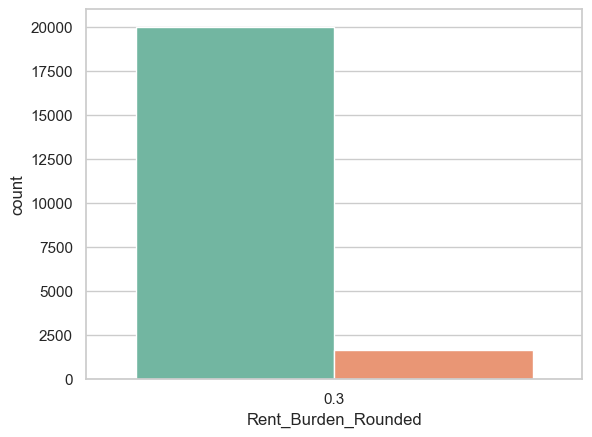

In [48]:
merged['Rent_Burden_Rounded'] = merged['Rent_Burden'].round(2)

sns.countplot(data=merged, x='Rent_Burden_Rounded', hue='Default_Flag', palette='Set2')
plt.title("Rounded Rent Burden Distribution by Default Risk")
plt.xlabel("Rounded Rent to Income Ratio")
plt.ylabel("Number of Applicants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()